In [ ]:
import os
import pandas as pd
import seaborn as sns
import pandas_profiling as pp
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [ ]:
os.chdir("F:/Machine Learning/Method Data Science/Kaggle Competition/")
data = pd.read_csv("application_train.csv")

In [3]:
pp.ProfileReport(data)

Number of variables,122
Number of observations,307511
Total Missing (%),9.6%
Total size in memory,286.2 MiB
Average record size in memory,976.0 B
Numeric,39
Categorical,16
Boolean,33
Date,0
Text (Unique),0
Rejected,34


Analysis from profile report- 

- 39 numeric variables, 16 categorical variables which may need to converted into numeric, 33 boolean variables.
- 34 variables can be rejected due to high correlation with other independent variables. - 'AMT_GOODS_PRICE', 'APARTMENTS_MEDI', 'APARTMENTS_MODE' ,'BASEMENTAREA_MEDI' , 'BASEMENTAREA_MODE', 'COMMONAREA_MEDI', 'COMMONAREA_MODE', 'ELEVATORS_MEDI' , 'ELEVATORS_MODE' , 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'REGION_RATING_CLIENT_W_CITY', 'TOTALAREA_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE' 
- Missing values variable with more than 50% missing values- APARTMENTS_AVG, BASEMENTAREA_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, EXT_SOURCE_1, FLOORSMAX_AVG, FLOORSMIN_AVG, FONDKAPREMONT_MODE, HOUSETYPE_MODE, LANDAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, OWN_CAR_AGE, WALLSMATERIAL_MODE, YEARS_BUILD_AVG

In [43]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
print(data.shape)

# dropping highly correlated 34 variables computed in profile report. Left out variables- 88

drop_attr=['AMT_GOODS_PRICE', 'APARTMENTS_MEDI', 'APARTMENTS_MODE' ,'BASEMENTAREA_MEDI' , 'BASEMENTAREA_MODE', 'COMMONAREA_MEDI', 'COMMONAREA_MODE', 'ELEVATORS_MEDI' , 'ELEVATORS_MODE' , 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'REGION_RATING_CLIENT_W_CITY', 'TOTALAREA_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE' ]
data=data.drop(drop_attr, axis=1)

print(data.shape)

(307511, 122)
(307511, 88)


In [79]:
# saving percentage of missing values in data for each variable. Then saving names of variables having more than 45% missing values.

Missing_attr=((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
Missing_attr_names= (Missing_attr[Missing_attr>0.45].index)
print(Missing_attr_names.size)    #26 variables

# dropping variables having more than 45% missing values from data
data= data.drop(Missing_attr_names, axis=1)

26


In [80]:
#initially there were 88 variables after dropping data left with 26 variables

data.shape

(307511, 62)

In [81]:
# Knowing variables having type as object to know categorical variables (16 in count as seen in profile report and 11 left after dropping columns)

obj_dtypes = [i for i in data.select_dtypes(include=['object']).columns ]
print(obj_dtypes)
print(len(obj_dtypes))

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
11


0    282686
1     24825
Name: TARGET, dtype: int64

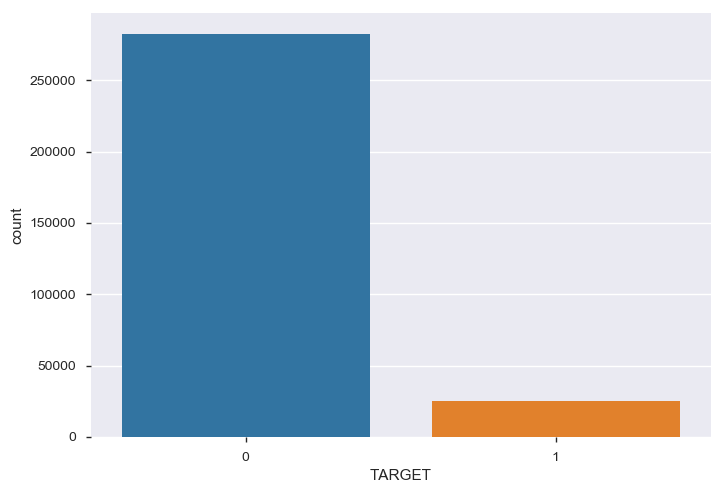

In [82]:
# counting number of values in each class to check whether it is an imbalance problem or not.
sns.countplot(data.TARGET)
data.TARGET.value_counts()
# Result shows it is an imbalance class problem.
# 1 representing defaulter and 0 means non-defaulter

In [83]:
data.columns
#SK_ID_CURR- unique identifier
#TARGET= 0 for non-defaulter, 1 for defaulter
#NAME_CONTRACT_TYPE = 

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',


In [68]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0


C:\Users\Public\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


TARGET                   0         1       All
NAME_CONTRACT_TYPE                            
Cash loans          0.9021  0.935388  0.904787
Revolving loans     0.0979  0.064612  0.095213
All                 1.0000  1.000000  1.000000
                      TARGET  NAME_CONTRACT_TYPE
TARGET              1.000000           -0.030896
NAME_CONTRACT_TYPE -0.030896            1.000000


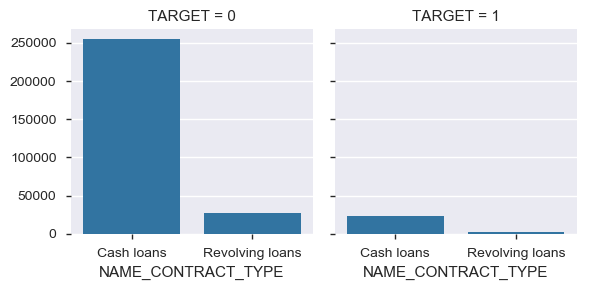

In [89]:
# Analyzing Contract type
g=sns.FacetGrid(data, col='TARGET')
g.map(sns.countplot, "NAME_CONTRACT_TYPE")
loan_type= pd.crosstab(data.NAME_CONTRACT_TYPE, data.TARGET, margins=True)  # setting margins to True to have all (rowsum and columnsum)
loan_type = loan_type/loan_type.ix["All"]    # divding by column sum
print(loan_type)
# cash loans 90.5% and resolving loans 9.5% (from profile report) . 93.5% Defaulters are having cash loans and 6.5% defaulters have resolving loans.


le=LabelEncoder()
data['NAME_CONTRACT_TYPE']=le.fit_transform(data['NAME_CONTRACT_TYPE'].astype(str))

print(data[['TARGET','NAME_CONTRACT_TYPE']].corr())  # for correlation variables need to be of numeric type. Object type does not generate correlation values
# Target and contract type are not highly correlated


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


C:\Users\Public\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


CODE_GENDER       F       M  XNA     All
TARGET                                  
0            188278   94404    4  282686
1             14170   10655    0   24825
All          202448  105059    4  307511


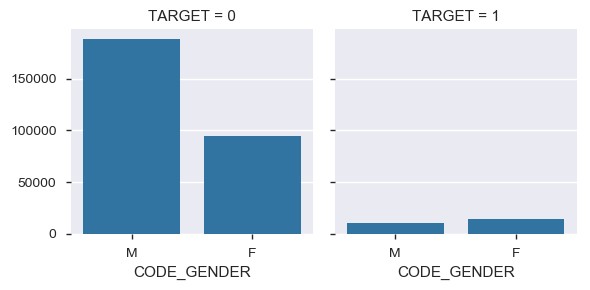

In [96]:
# analyzing CODE_GENDER - 3 disctint values, no missing value
print(data.CODE_GENDER.value_counts())

g=sns.FacetGrid(data, col='TARGET')
g.map(sns.countplot, "CODE_GENDER")
gender= pd.crosstab(data.TARGET, data.CODE_GENDER, margins=True)  
#gender = gender/gender.ix["All"]    
print(gender)

#le=LabelEncoder()
#data['CODE_GENDER']=le.fit_transform(data['CODE_GENDER'].astype(str))

#print(data[['TARGET','CODE_GENDER']].corr())  

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\Public\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


TARGET               0         1       All
FLAG_OWN_CAR                              
N             0.656824  0.694824  0.659892
Y             0.343176  0.305176  0.340108
All           1.000000  1.000000  1.000000
                TARGET  FLAG_OWN_CAR
TARGET        1.000000     -0.021851
FLAG_OWN_CAR -0.021851      1.000000


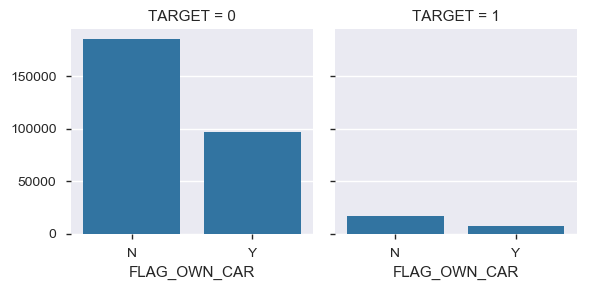

In [103]:
#FLAG_OWN_CAR analysis. categorical variable with values Y or N. NO missing values
print(data.FLAG_OWN_CAR.value_counts())
own_car= pd.crosstab(data.FLAG_OWN_CAR, data.TARGET, margins= True)
own_car= own_car/own_car.ix['All']
#own_car2= own_car.div(own_car['All'], axis=0) # divide by rowsum
print(own_car)

g=sns.FacetGrid(data, col='TARGET')
g.map(sns.countplot, "FLAG_OWN_CAR")
# in defaulters 69.5% does not have a car, while 30.5% have a car

data['FLAG_OWN_CAR']= le.fit_transform(data['FLAG_OWN_CAR'])
print(data[['TARGET','FLAG_OWN_CAR']].corr())

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Public\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


TARGET                  0         1       All
FLAG_OWN_REALTY                              
0                0.305487  0.315891  0.306327
1                0.694513  0.684109  0.693673
All              1.000000  1.000000  1.000000
                TARGET  FLAG_OWN_CAR
TARGET        1.000000     -0.021851
FLAG_OWN_CAR -0.021851      1.000000
{'0': 0, '1': 1}


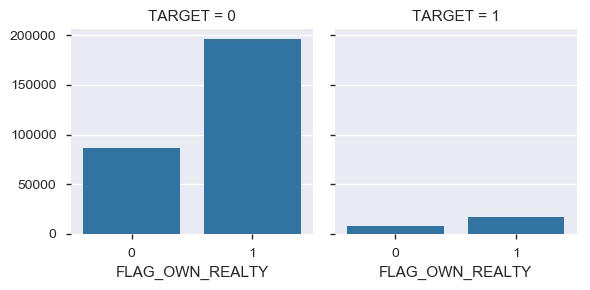

In [112]:
own_realty= pd.crosstab(data.FLAG_OWN_REALTY, data.TARGET, margins=True)
own_realty= own_realty/own_realty.ix['All']
print(own_realty)
g=sns.FacetGrid(data, col='TARGET')
g.map(sns.countplot, "FLAG_OWN_REALTY")

data['FLAG_OWN_REALTY']=le.fit_transform(data['FLAG_OWN_REALTY'].astype(str))
print(data[['TARGET','FLAG_OWN_CAR']].corr())
le_map=dict(zip(le.classes_,le.transform(le.classes_)))  # dictionary of mapping (0:N, 1:Y)
print(le_map)

# 68.4% of defaulters own a realty

C:\Users\Public\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


TARGET             0      1     All
CNT_CHILDREN                       
0             198762  16609  215371
1              55665   5454   61119
2              24416   2333   26749
3               3359    358    3717
4                374     55     429
5                 77      7      84
6                 15      6      21
7                  7      0       7
8                  2      0       2
9                  0      2       2
10                 2      0       2
11                 0      1       1
12                 2      0       2
14                 3      0       3
19                 2      0       2
All           282686  24825  307511
                TARGET  CNT_CHILDREN
TARGET        1.000000      0.019187
CNT_CHILDREN  0.019187      1.000000


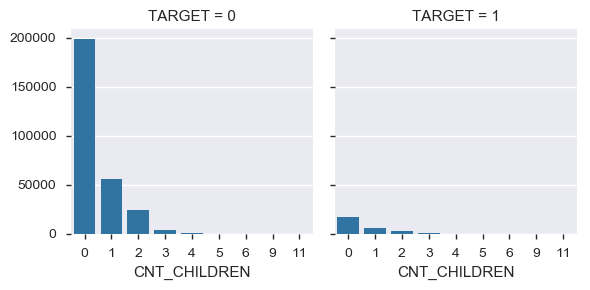

In [118]:
data.CNT_CHILDREN.value_counts()
# skewed data
g= sns.FacetGrid(data, col='TARGET')
g.map(sns.countplot, 'CNT_CHILDREN')
children= pd.crosstab(data.CNT_CHILDREN, data.TARGET, margins=True)
print(children)

#skewed variable.. needs to be dealt with
print(data[['TARGET','CNT_CHILDREN']].corr())

In [ ]:
plt.hist(data.AMT_INCOME_TOTAL, bins=50)

                    TARGET  AMT_INCOME_TOTAL
TARGET            1.000000         -0.003982
AMT_INCOME_TOTAL -0.003982          1.000000


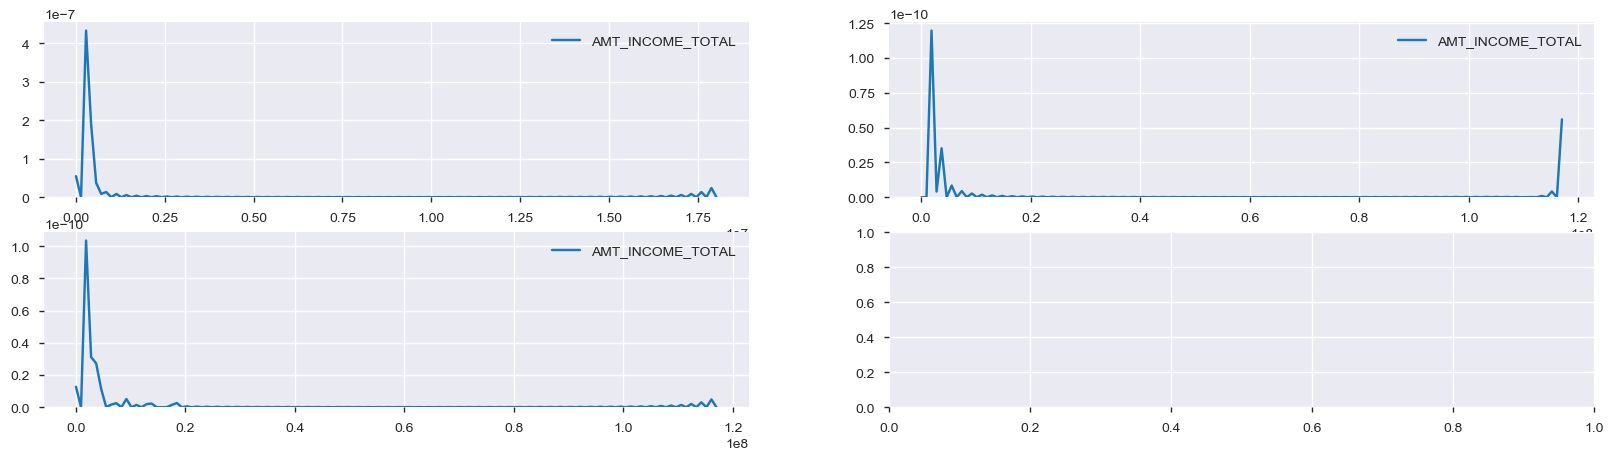

In [152]:
# AMT_INCOME_TOTAL analysis - defaulters are usually either very low income person or very high salaried person
fig, ax = plt.subplots(2,2, figsize=(20, 5))

sns.kdeplot(data[data.TARGET==0]['AMT_INCOME_TOTAL'],ax=ax[0][0])
sns.kdeplot(data[data.TARGET==1]['AMT_INCOME_TOTAL'],ax=ax[0][1])

print(data[['TARGET','AMT_INCOME_TOTAL']].corr(method='pearson'))

sns.kdeplot(data.AMT_INCOME_TOTAL, ax=ax[1][0])

In [124]:
data[data['TARGET']==0][1:20]['AMT_INCOME_TOTAL']

2      67500.000
3     135000.000
4     121500.000
5      99000.000
6     171000.000
7     360000.000
8     112500.000
9     135000.000
10    112500.000
11     38419.155
12     67500.000
13    225000.000
14    189000.000
15    157500.000
16    108000.000
17     81000.000
18    112500.000
19     90000.000
20    135000.000
Name: AMT_INCOME_TOTAL, dtype: float64

In [67]:
le=LabelEncoder()
for obj in obj_dtypes:
    data[obj]=le.fit_transform(data[obj].astype(str))
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_name_mapping)
    
# Error occured when used only le.fit_transform(data[obj]) because This is due to the series df[cat] containing elements that has varying data types e.g.(strings and/or floats). This could be due to the way the data is read, i.e. numbers are read as float and text as strings or the datatype was float and changed after the fillna operation in other words pandas data type 'Object' indicates mixed types rather than str type
# so as a solution used le.fit_transform(data[obj].astype(str))
# preparing dictionary for each transformation

{'Cash loans': 0, 'Revolving loans': 1}
{'F': 0, 'M': 1, 'XNA': 2}
{'N': 0, 'Y': 1}
{'N': 0, 'Y': 1}
{'Children': 0, 'Family': 1, 'Group of people': 2, 'Other_A': 3, 'Other_B': 4, 'Spouse, partner': 5, 'Unaccompanied': 6, 'nan': 7}
{'Businessman': 0, 'Commercial associate': 1, 'Maternity leave': 2, 'Pensioner': 3, 'State servant': 4, 'Student': 5, 'Unemployed': 6, 'Working': 7}
{'Academic degree': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Secondary / secondary special': 4}
{'Civil marriage': 0, 'Married': 1, 'Separated': 2, 'Single / not married': 3, 'Unknown': 4, 'Widow': 5}
{'Co-op apartment': 0, 'House / apartment': 1, 'Municipal apartment': 2, 'Office apartment': 3, 'Rented apartment': 4, 'With parents': 5}
{'FRIDAY': 0, 'MONDAY': 1, 'SATURDAY': 2, 'SUNDAY': 3, 'THURSDAY': 4, 'TUESDAY': 5, 'WEDNESDAY': 6}
{'Advertising': 0, 'Agriculture': 1, 'Bank': 2, 'Business Entity Type 1': 3, 'Business Entity Type 2': 4, 'Business Entity Type 3': 5, 'Cleaning': 6

In [58]:
Null_attr=((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
print(Null_attr)

NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
DAYS_ID_PUBLISH                0.000000
DAYS_EMPLOYED                  0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000
DAYS_REGISTRATION              0.000000
FLAG_DOCUMENT_21               0.000000
DAYS_BIRTH                     0.000000
REGION_RATING_CLIENT           0.000000
NAME_HOUSING_TYPE              0.000000
NAME_FAMILY_STATUS             0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_INCOME_TYPE               0.000000
AMT_CREDIT                     0.000000


In [71]:
data.corr().style.background_gradient(cmap='summer_r')

C:\Users\Public\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [65]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data.CODE_GENDER)
data.CODE_GENDER=le.transform(data.CODE_GENDER)

In [66]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,1,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,0,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,1,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,0,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,1,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
data.CODE_GENDER.dtype


dtype('int64')

In [68]:
list(le.classes_)

['F', 'M', 'XNA']